In [32]:
import pandas as pd

asos = pd.read_csv ('../asos_train.csv', encoding = 'cp949')
era5 = pd.read_csv('../era5/all_area/era5_korea.csv')

In [31]:
print(asos.columns)
print(era5.columns)

AttributeError: 'list' object has no attribute 'columns'

In [33]:
era5_YA = era5[(era5['longitude'] == 126.38) & (era5['latitude'] == 34.68)]
era5_YA.head()

,longitude,latitude,time,wind_speed(m/s),snowfall(cm),precipitation(cm),temp(C),radiation(MJ/m2),cloud_cover(1/10),year,month,hour
516840,126.38,34.68,2013-01-01 00:00:00,8.461536,0.028598,0.102002,4.89297,0.092415,4.701637,2013,1,0
516841,126.38,34.68,2013-01-01 01:00:00,9.551198,0.005415,0.110808,4.73626,0.261774,3.350704,2013,1,1
516842,126.38,34.68,2013-01-01 02:00:00,9.530965,0.000000,0.114110,5.46276,0.685054,3.194445,2013,1,2
516843,126.38,34.68,2013-01-01 03:00:00,9.272070,0.000000,0.074117,5.56150,0.906219,2.682639,2013,1,3
516844,126.38,34.68,2013-01-01 04:00:00,8.992600,0.000000,0.071915,5.75582,1.218034,1.151490,2013,1,4


In [34]:
asos_YA = asos[asos['name'] == '영암에프원태양광b']
asos_YA.head()

,power,date,name,capacities,asos_num,land,power/land,location,Date/Time,Temp(C),...,Cloud_Form,Lowest_Cloud_Height(100m),Visibility(10m),Ground_Condition,Phenomenon_Number,Ground Temp,5cm_Underground_Temp,10cm_Underground_Temp,20cm_Underground_Temp,30cm_Underground_Temp
0,1296000.0,2022-12-31 09:00:00,영암에프원태양광b,13.296,165.0,175507.2,7.384312,165.0,2022-12-31 09:00:00,0.1,...,NaN,NaN,1295.0,NaN,NaN,-0.5,2.5,3.3,4.2,4.7
1,4377600.0,2022-12-31 10:00:00,영암에프원태양광b,13.296,165.0,175507.2,24.942566,165.0,2022-12-31 10:00:00,1.7,...,NaN,NaN,1534.0,NaN,NaN,0.0,2.9,3.4,4.2,4.8
2,7065600.0,2022-12-31 11:00:00,영암에프원태양광b,13.296,165.0,175507.2,40.258177,165.0,2022-12-31 11:00:00,2.8,...,NaN,NaN,2617.0,NaN,NaN,3.8,3.7,3.7,4.2,4.8
3,8860800.0,2022-12-31 12:00:00,영암에프원태양광b,13.296,165.0,175507.2,50.486818,165.0,2022-12-31 12:00:00,4.1,...,NaN,NaN,2779.0,NaN,NaN,10.3,4.4,3.9,4.2,4.8
4,7891200.0,2022-12-31 13:00:00,영암에프원태양광b,13.296,165.0,175507.2,44.962258,165.0,2022-12-31 13:00:00,4.2,...,Sc,10.0,3442.0,NaN,NaN,6.1,4.7,4.3,4.3,4.7


In [16]:
asos_YA['date'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 0        2022-12-31 09:00:00
1        2022-12-31 10:00:00
2        2022-12-31 11:00:00
3        2022-12-31 12:00:00
4        2022-12-31 13:00:00
                ...         
43693    2013-03-19 15:00:00
43694    2013-03-19 16:00:00
43695    2013-03-19 17:00:00
43696    2013-03-19 18:00:00
43697    2013-03-19 19:00:00
Name: date, Length: 43698, dtype: object>

In [17]:
import matplotlib.pyplot as plt

print(asos_YA['Wind_speed(m/s)'].describe())
print(era5_YA['wind_speed(m/s)'].describe())

count    43681.000000
mean         3.757583
std          2.230821
min          0.000000
25%          2.100000
50%          3.300000
75%          4.900000
max         17.200000
Name: Wind_speed(m/s), dtype: float64
count    103114.000000
mean          4.125886
std           2.306265
min           0.007386
25%           2.389082
50%           3.675259
75%           5.448801
max          18.788600
Name: wind_speed(m/s), dtype: float64


In [29]:
print(asos_YA['Solar_Radiation(MJ/m2)'].describe())
print(era5_YA['radiation(MJ/m2)'].describe())

count    43681.000000
mean         1.120796
std          0.916422
min          0.000000
25%          0.310000
50%          0.910000
75%          1.800000
max          3.720000
Name: Solar_Radiation(MJ/m2), dtype: float64
count    1.031140e+05
mean     3.996308e-01
std      6.844803e-01
min     -1.250000e-07
25%      0.000000e+00
50%      7.886250e-04
75%      5.434948e-01
max      3.004984e+00
Name: radiation(MJ/m2), dtype: float64


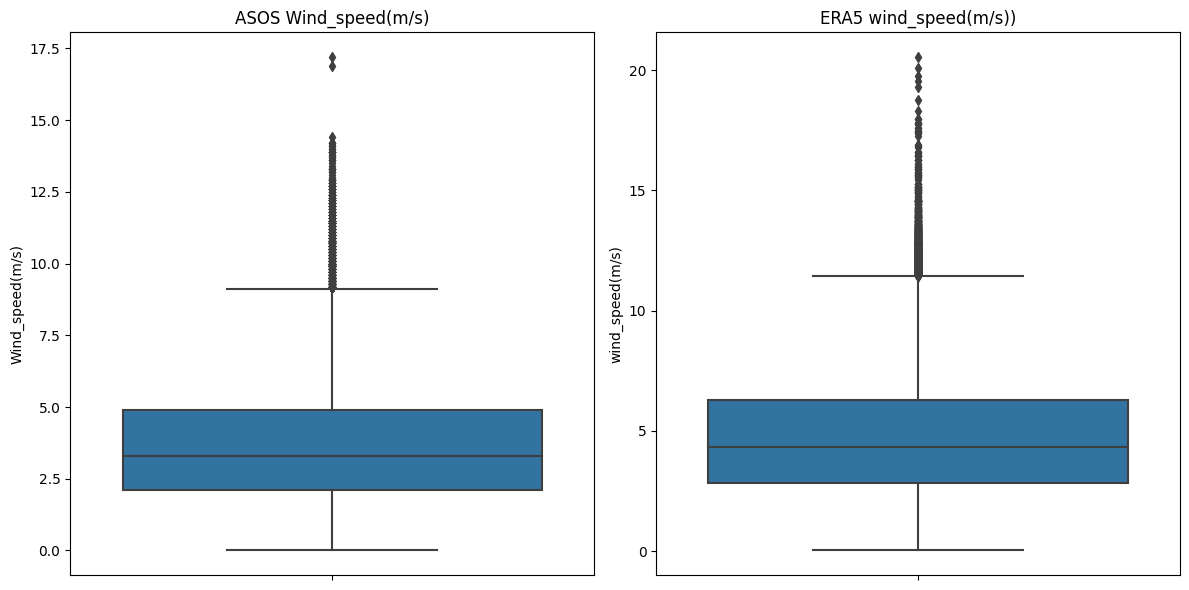

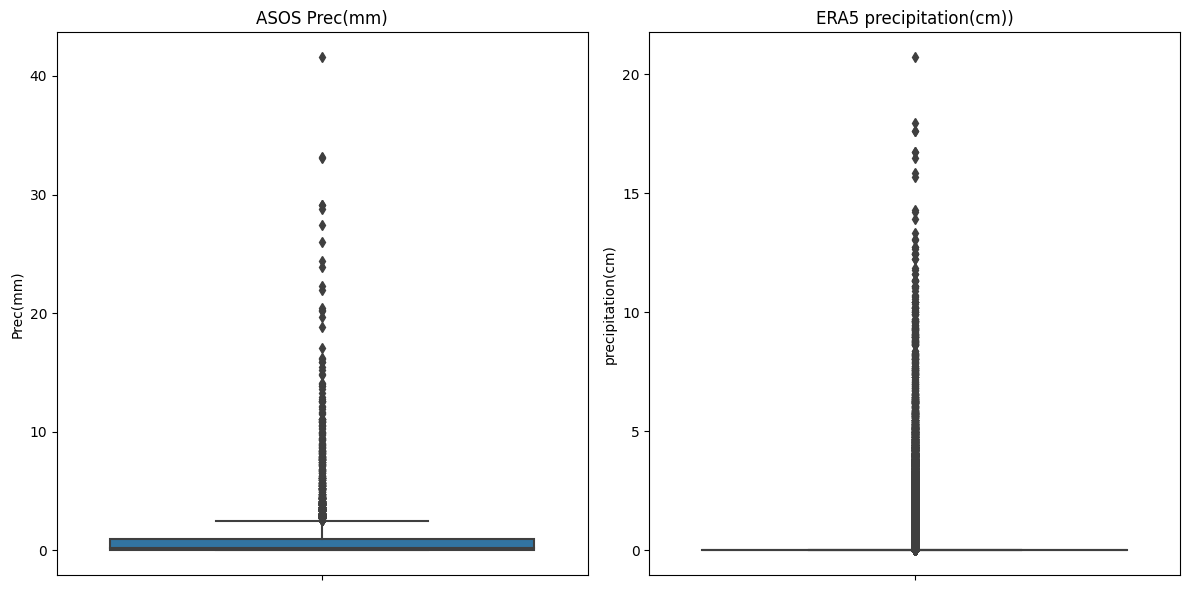

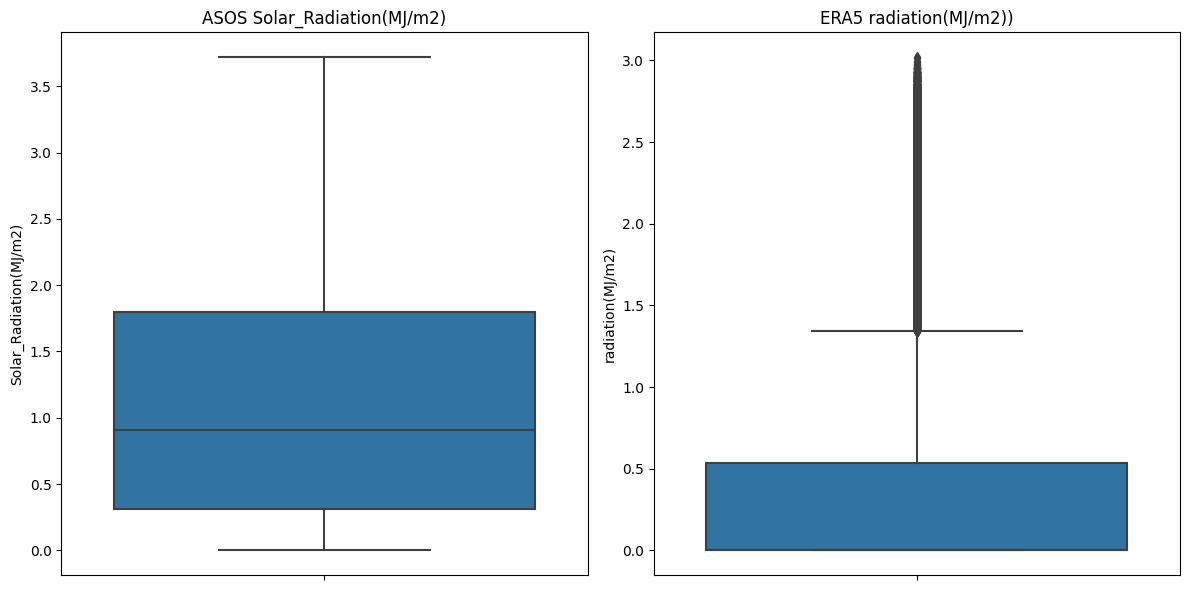

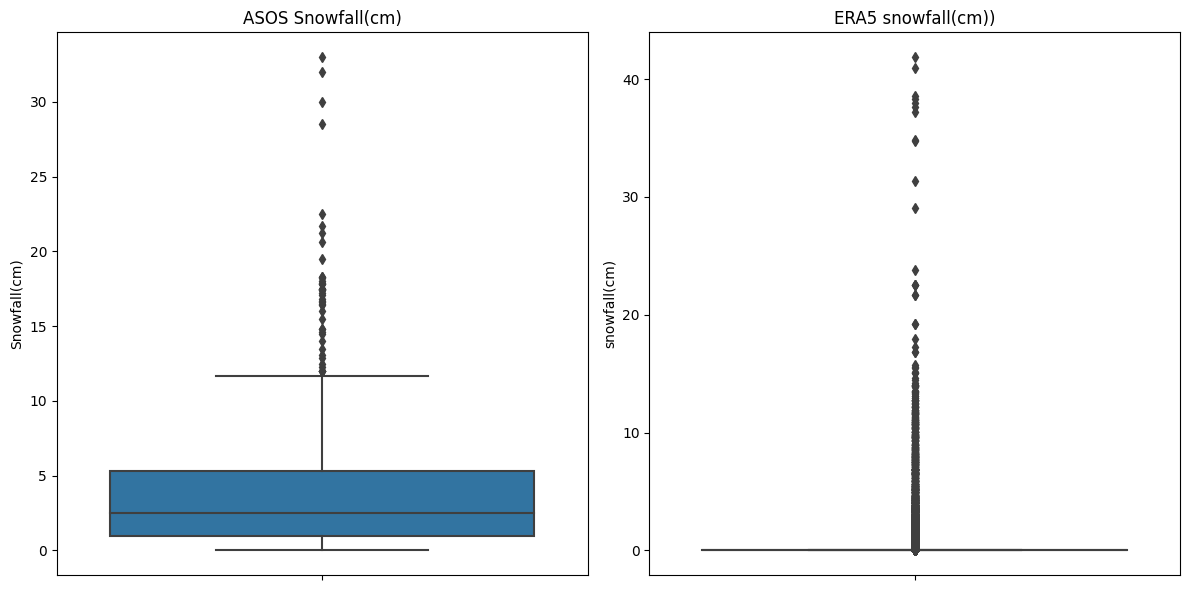

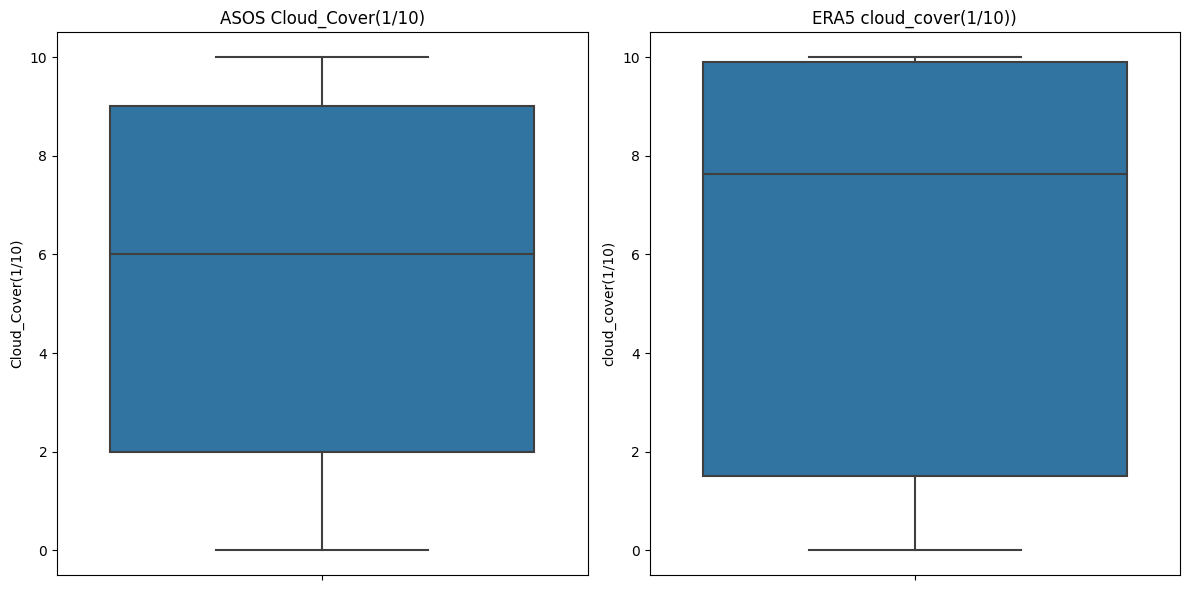

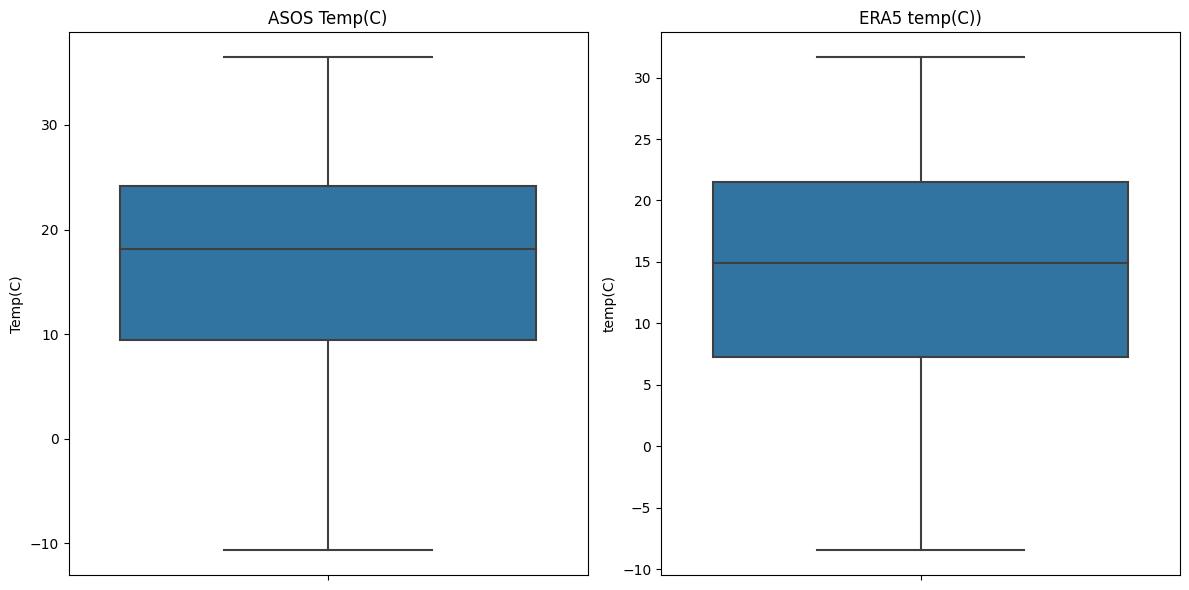

In [37]:
asos = ['Wind_speed(m/s)', 'Prec(mm)', 'Solar_Radiation(MJ/m2)', 'Snowfall(cm)', 'Cloud_Cover(1/10)', 'Temp(C)']
era5 = ['wind_speed(m/s)', 'precipitation(cm)', 'radiation(MJ/m2)', 'snowfall(cm)', 'cloud_cover(1/10)', 'temp(C)']

for i, j in zip(asos, era5):

    plt.figure(figsize=(12, 6))

    # Dataset 1의 박스 플롯
    plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 그래프
    sns.boxplot(y=asos_YA[i])
    plt.title(f'ASOS {i}')
    plt.ylabel(f'{i}')

    # Dataset 2의 박스 플롯
    plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 그래프
    sns.boxplot(y=era5_YA[j])
    plt.title(f'ERA5 {j})')
    plt.ylabel(f'{j}')

    plt.tight_layout()  # 그래프 간격 조절
    plt.show()

In [36]:
era5_YA['snowfall(cm)'] = era5_YA['snowfall(cm)']*10